<a href="https://colab.research.google.com/github/jeanmichael1993/Atividade_2_Regressao/blob/master/Atividade_2_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bank Marketing

https://archive.ics.uci.edu/dataset/222/bank+marketing

In [8]:
import pandas as pd

pd_base = pd.read_csv('bank-full.csv', sep=";")

In [9]:
pd_base.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [39]:
pd_base['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [10]:
pd_base.shape

(45211, 17)

In [11]:
pd_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
pd_base.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
pd_base.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [30]:
pd_base['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [40]:
import altair as alt

sampled_data = pd_base.sample(n=5000)  # Take a random sample of 5000 rows

age = alt.Chart(sampled_data).mark_bar().encode(
       x='age:Q',
       y='count():Q',  # Assuming you want a histogram of ages
       tooltip='count()'
   ).properties(
       title='Age Distribution',
       width=500,
       height=300
   )

balance = alt.Chart(sampled_data).mark_bar().encode(
       x='balance:Q',
       y='count():Q',  # Assuming you want a histogram of balances
       tooltip='balance'
   ).properties(
       title='Balance Distribution',
       width=500,
       height=300
   )

age | balance

alt.HConcatChart(...)

In [95]:
base = pd_base[['age','balance','y','job','marital','education','default','housing','loan','day','duration','campaign','pdays','previous']]

In [96]:
base

,age,balance,y,job,marital,education,default,housing,loan,day,duration,campaign,pdays,previous
0,58,2143,no,management,married,tertiary,no,yes,no,5,261,1,-1,0
1,44,29,no,technician,single,secondary,no,yes,no,5,151,1,-1,0
2,33,2,no,entrepreneur,married,secondary,no,yes,yes,5,76,1,-1,0
3,47,1506,no,blue-collar,married,unknown,no,yes,no,5,92,1,-1,0
4,33,1,no,unknown,single,unknown,no,no,no,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,yes,technician,married,tertiary,no,no,no,17,977,3,-1,0
45207,71,1729,yes,retired,divorced,primary,no,no,no,17,456,2,-1,0
45208,72,5715,yes,retired,married,secondary,no,no,no,17,1127,5,184,3
45209,57,668,no,blue-collar,married,secondary,no,no,no,17,508,4,-1,0


In [97]:
from sklearn.preprocessing import LabelEncoder

lista = ['job','marital','education','default','housing','loan']
for i in lista:
  le = LabelEncoder()
  base[i] = le.fit_transform(base[i])


<ipython-input-97-ad49eb64076c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base[i] = le.fit_transform(base[i])
<ipython-input-97-ad49eb64076c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base[i] = le.fit_transform(base[i])
<ipython-input-97-ad49eb64076c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [98]:
base

,age,balance,y,job,marital,education,default,housing,loan,day,duration,campaign,pdays,previous
0,58,2143,no,4,1,2,0,1,0,5,261,1,-1,0
1,44,29,no,9,2,1,0,1,0,5,151,1,-1,0
2,33,2,no,2,1,1,0,1,1,5,76,1,-1,0
3,47,1506,no,1,1,3,0,1,0,5,92,1,-1,0
4,33,1,no,11,2,3,0,0,0,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,yes,9,1,2,0,0,0,17,977,3,-1,0
45207,71,1729,yes,5,0,0,0,0,0,17,456,2,-1,0
45208,72,5715,yes,5,1,1,0,0,0,17,1127,5,184,3
45209,57,668,no,1,1,1,0,0,0,17,508,4,-1,0


In [99]:
X = base.drop('y', axis=1)
y = base['y']

le = LabelEncoder()
y = le.fit_transform(y)

#Regressão Logistica

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(penalty='l2', max_iter=200)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [112]:
model.intercept_

array([-3.42712013])

In [113]:
y_pred = model.predict(X_test_scaled)

In [114]:
y_prob = model.predict_proba(X_test_scaled)

In [115]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.8886021822471247


In [116]:
confusion_matrix(y_test, y_pred)

array([[11781,   185],
       [ 1326,   272]])

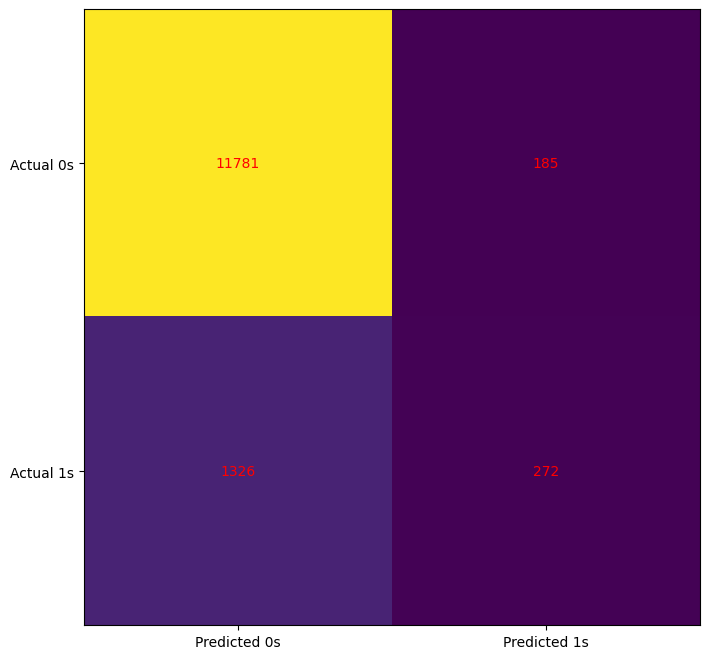

In [117]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.60      0.17      0.26      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564

